In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Square layout, 2-component R-D system with fixed stoich

A reaction-diffusion model is a mathematical model which calculates the concentration of two substances at a given time based on the substances'

- diffusion
- feed rate (how fast the substances are being created by the reaction OR a source)
- removal rate (how fast the substances are being used up by the reaction OR a sink)
- type of reaction between the two

For the reaction $u + 2v \rightarrow 3v$ (i.e. two of species V come together to convert a single U into V) this is governed by the differential equations

\begin{equation}
\frac{\partial u}{\partial t} = r_u \nabla^2 u - uv^2 + f(1-u)
\end{equation}

\begin{equation}
\frac{\partial v}{\partial t} = r_v \nabla^2 v + uv^2 - (f+k)v
\end{equation}

Where $u$ and $v$ are the concentrations of the two reactants, f is the rate at which reactant u is fed into the system (by an outside source), k is the rate at which reactant v is removed from the system (by an outside sink), and $r_u$ and $r_v$ are the diffusion rates of $u$ and $v$ respectively.

The system after a finite time step $dt$ is therefore:

\begin{equation}
u_2 = u_1 + [r_u \nabla^2 u - uv^2 + f(1-u)]dt
\end{equation}

\begin{equation}
v_2 = v_1 + [r_v \nabla^2 v + uv^2 - (f+k)v]dt.
\end{equation}

In [17]:
# need an input grid of values (initial conditions)
initial = np.ones((100, 100, 1, 2))
initial[:,:50,0,1] = initial[:,:50,0,1]*0.0
initial[:,50:,0,0] = initial[:,:50,0,1]*0.0

## Advance the initial conditions by a single time step

In [16]:
# first need to define a laplacian kernel - we're going to do the laplacian by just convolving the whole arrays with
# this kernel. keep values flexible so we can play with them later. start with a 3x3

cent = -1
conn4 = 0.2
conn8 = 0.05 # values suggested by https://www.karlsims.com/rd.html

lap = np.array([[conn8, conn4, conn8],
                [conn4, cent, conn4],
                [conn8, conn4, conn8]])

# define reaction and diffustion rate constants (these also need to be adjustable)
ru = 1.0
rv = 0.5
f = 0.055
k = 0.062

# time step (also a user input)
dt = 1.0

In [18]:
frame_t1 = initial

In [23]:
# start by moving U forward one time step
lapu = convolve(frame_t1[:,:,0,0], lap, mode='constant', cval=0.0)
diffterm = ru * lapu

reactterm = frame_t1[:,:,0,0] * frame_t1[:,:,0,1]**2

sourceterm = f*(1 - frame_t1[:,:,0,0])

frame_t2 = frame_t1[:,:,0,0] + (diffterm - reactterm + sourceterm)*dt

In [32]:
# move V forward one time step
lapv = convolve(frame_t1[:,:,0,1], lap, mode='constant', cval=0.0)
diffterm = rv * lapv

# same reactterm as for U

sinkterm = (f + k)*frame_t1[:,:,0,1]

frame_t2 = np.stack((frame_t2, frame_t1[:,:,0,1] + (diffterm + reactterm - sinkterm)*dt), axis=-1)

<IPython.core.display.Javascript object>


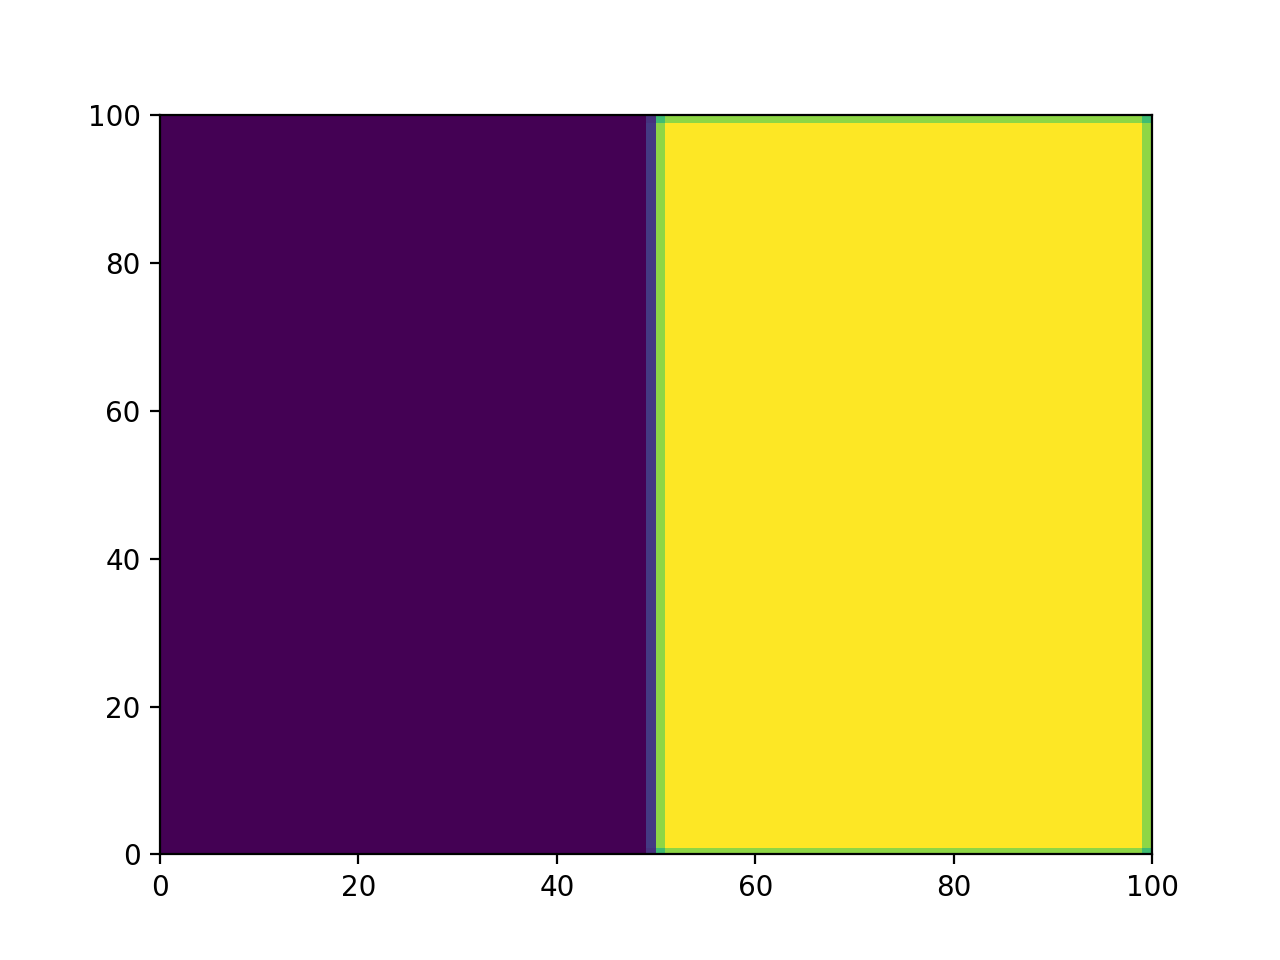

In [35]:
%matplotlib notebook

plt.pcolormesh(frame_t2[:,:,1])